In [98]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
pd.set_option('display.max_columns', None)

In [99]:
df =pd.read_csv("E:\Edrive\Sudhanshu\Datatrained Projects\DSData-master\Telecom_customer_churn.csv")

In [100]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [101]:
df.shape

(7043, 21)

In [102]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

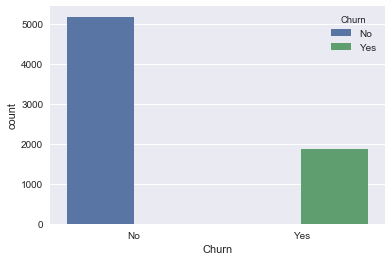

In [103]:
sns.countplot(x='Churn', data=df, hue='Churn')

In [104]:
df.drop(['customerID'], axis=1, inplace=True)

In [105]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [106]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = 'coerce')

In [107]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [108]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [109]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [110]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [111]:
df1 = pd.get_dummies(df[['InternetService','Contract','PaymentMethod']])
df1.head()

,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,1,0,1,0,0,0
4,0,1,0,1,0,0,0,0,1,0


In [112]:
df.drop(['InternetService','Contract','PaymentMethod'],axis=1, inplace=True)

In [113]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,No,Yes,No,No,No,No,Yes,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,Yes,No,Yes,No,No,No,No,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,Yes,Yes,No,No,No,No,Yes,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,Yes,No,Yes,Yes,No,No,No,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,No,Yes,70.70,151.65,Yes


In [114]:
for col in ('Partner', 'Dependents', 'PhoneService' , 'OnlineSecurity',
        'OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV',
        'StreamingMovies','PaperlessBilling','MultipleLines','Churn'):
    df[col] = [1 if x == "Yes" else 0 for x in df[col]]

In [115]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0
1,Male,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0
2,Male,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1
3,Male,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0
4,Female,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1


In [120]:
cust_churn = pd.concat([df, df1], axis=1)

In [121]:
cust_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,Male,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,Male,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,Male,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,Female,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0


In [122]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cust_churn['gender'] = le.fit_transform(cust_churn['gender'])

In [123]:
cust_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0


In [124]:
cust_churn.corr()['Churn'].sort_values()

tenure                                    -0.352229
Contract_Two year                         -0.302253
InternetService_No                        -0.227890
TotalCharges                              -0.198324
Contract_One year                         -0.177820
OnlineSecurity                            -0.171226
TechSupport                               -0.164674
Dependents                                -0.164221
Partner                                   -0.150448
PaymentMethod_Credit card (automatic)     -0.134302
InternetService_DSL                       -0.124214
PaymentMethod_Bank transfer (automatic)   -0.117937
PaymentMethod_Mailed check                -0.091683
OnlineBackup                              -0.082255
DeviceProtection                          -0.066160
gender                                    -0.008612
PhoneService                               0.011942
MultipleLines                              0.040102
StreamingMovies                            0.061382
StreamingTV 

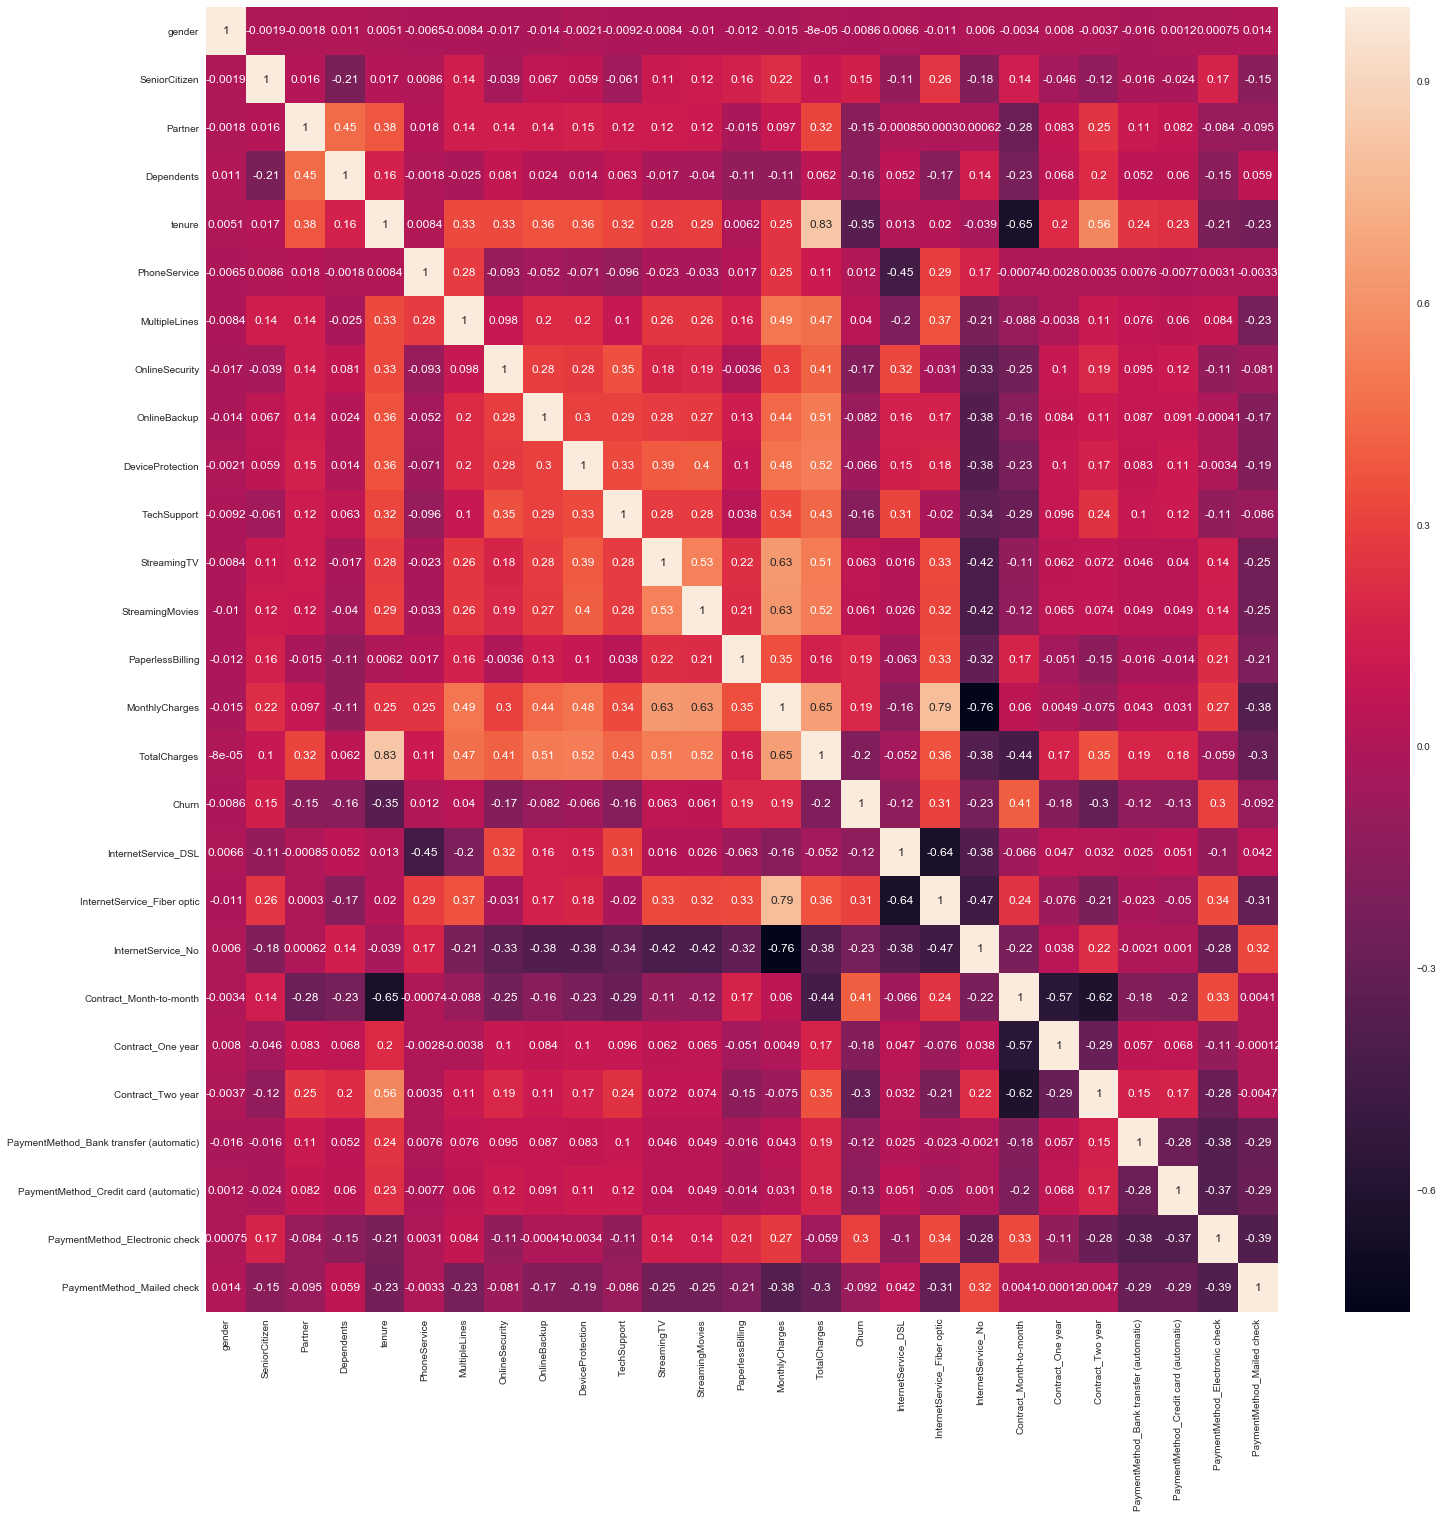

In [127]:
plt.figure(figsize=(24,24))
sns.heatmap(cust_churn.corr(), annot = True)

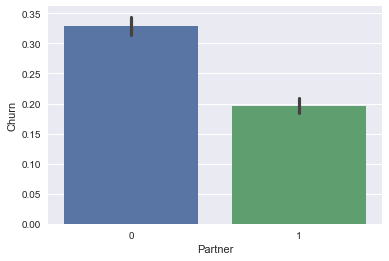

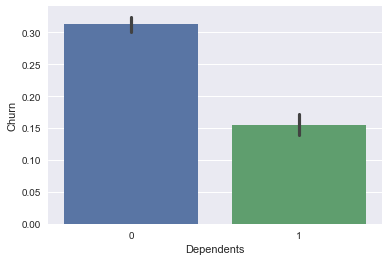

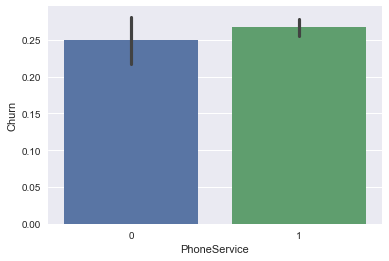

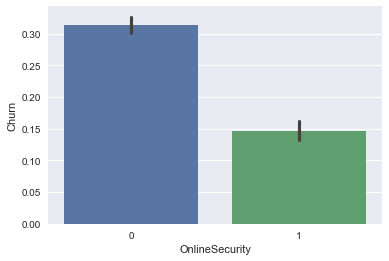

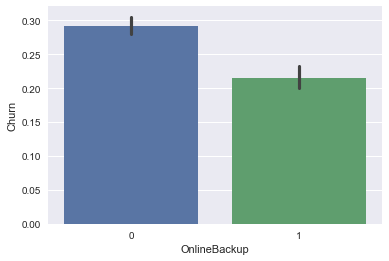

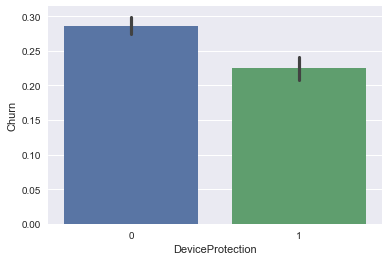

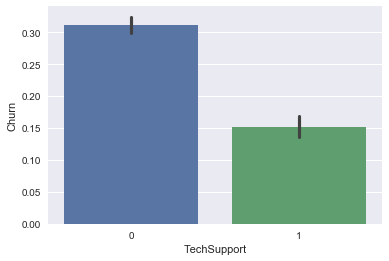

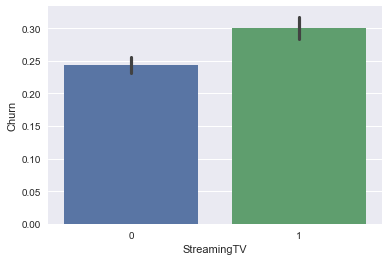

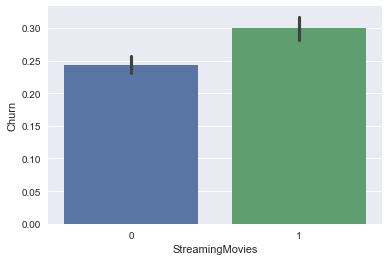

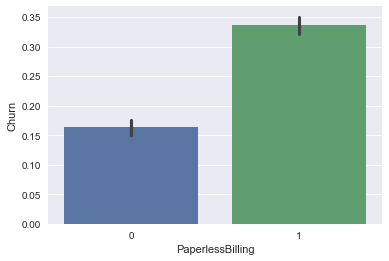

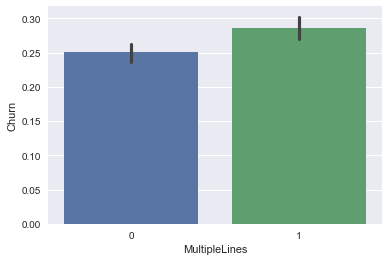

In [128]:
for col in ('Partner', 'Dependents', 'PhoneService' , 'OnlineSecurity',
        'OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV',
        'StreamingMovies','PaperlessBilling','MultipleLines'):
    sns.barplot(x = col, y = 'Churn', data = cust_churn)
    plt.show()

In [131]:
y = cust_churn['Churn']
x = cust_churn.drop(["Churn"],axis=1)

In [130]:
y.shape

(7043,)

In [132]:
x.shape

(7043, 26)

In [139]:
from sklearn.metrics import accuracy_score, mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [140]:
x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size = 0.2, random_state=1)

In [141]:
y_train.value_counts()

0    4113
1    1521
Name: Churn, dtype: int64

In [142]:
y_test.value_counts()

0    1061
1     348
Name: Churn, dtype: int64

In [143]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [145]:
lr_pred = lr.predict(x_test)

In [147]:
print("Mean-squared error using Logistic Regression:", mse(y_test, lr_pred))
print("Accuracy with Logistic Regression:",accuracy_score(y_test, lr_pred))

Mean-squared error using Logistic Regression: 0.185947480483
Accuracy with Logistic Regression: 0.814052519517


In [150]:
svm= SVC()
svm.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [151]:
svm_pred = svm.predict(x_test)

In [152]:
print("Mean-squared error using SVM :", mse(y_test, svm_pred))
print("Accuracy with SVM :",accuracy_score(y_test, svm_pred))

Mean-squared error using SVM : 0.217175301632
Accuracy with SVM : 0.782824698368


In [153]:
rf= RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [155]:
rf_pred = rf.predict(x_test)
print("Mean-squared error using Random Forest :", mse(y_test, rf_pred))
print("Accuracy with Random Forest :",accuracy_score(y_test, rf_pred))

Mean-squared error using Random Forest : 0.207239176721
Accuracy with Random Forest : 0.792760823279
